In [85]:
# reading data from csv
import pandas as pd
df = pd.read_csv('../data/raw/startup data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [132]:
df_category_size = df.groupby(["category_code"], as_index=False).agg("size")
#df_category_founded = df.groupby(["category_code", "founded_at"]).agg("size")
df_category_founded = df.groupby(["founded_at", "category_code"], as_index=False).agg(size=("category_code","size"))
df_category_founded['founded_at'] = pd.DatetimeIndex(df_category_founded['founded_at']).year
df_category_funding = df.groupby(["category_code"], as_index=False).agg(funding=("funding_total_usd","sum"))
df_category_company = df[(df["category_code"] == "mobile") | (df["category_code"] == "software")
                        | (df["category_code"] == "web") | (df["category_code"] == "biotech")]
#df_category_company
df_category_company_funding = df_category_company.groupby(["category_code","name"], as_index=False).agg(funding=("funding_total_usd","sum"))

#df_category_company_funding = df.groupby([df[df["category_code"] == "mobile" | df["category_code"] == "software"
#                                          | df["category_code"] == "web" | df["category_code"] == "biotech"], 
#                                         "name"], as_index=False).agg(funding=("funding_total_usd","sum"))
#df_category_funding_year = df.groupby(["founded_at", "category_code"], as_index=False).agg(funding=("funding_total_usd","sum"))
#df_category_funding_year['founded_at'] = pd.DatetimeIndex(df_category_funding_year['founded_at']).year
#df_category_funding
#df_category_size
#df_category_founded.head(30)
#df_category_funding_year.head(30)
df_category_company_funding[(df_category_company_funding["name"] == "Plixi")]

,category_code,name,funding
355,web,Plixi,2600000


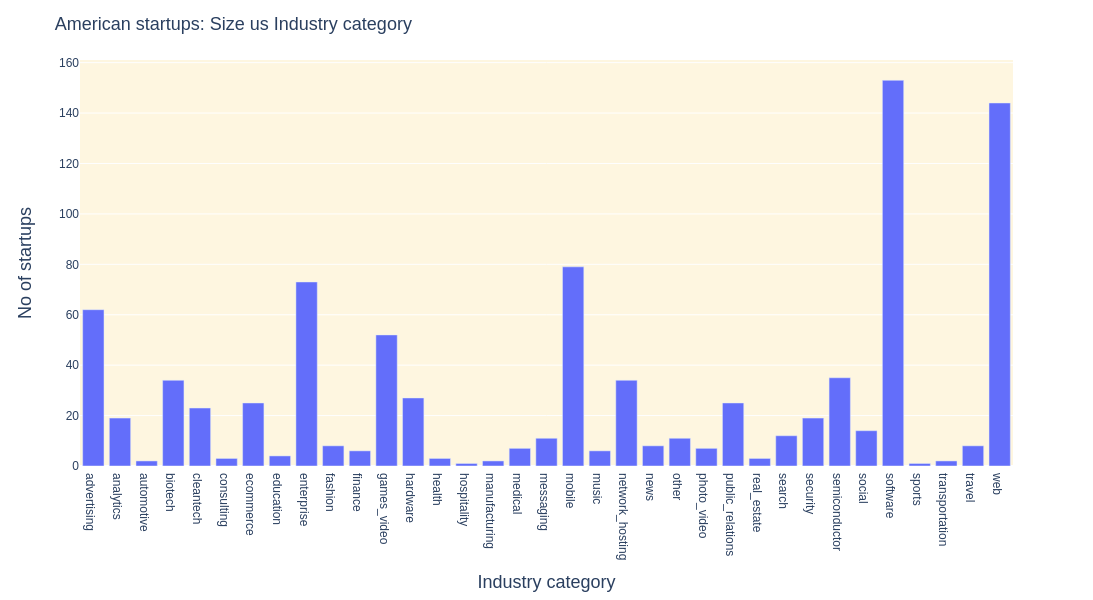

In [109]:
import plotly.express as px
fig = px.bar(df_category_size, x="category_code", y="size", height=600)
fig.update_layout(
    title={"text": "American startups: Size us Industry category", "font": {"size": 18}},
    xaxis={"title": {"text": " Industry category", "font": {"size": 18}}},
    yaxis={"title": {"text": " No of startups", "font": {"size": 18}}},
    paper_bgcolor='white',plot_bgcolor='rgb(254, 246, 224)'
)
fig.show()

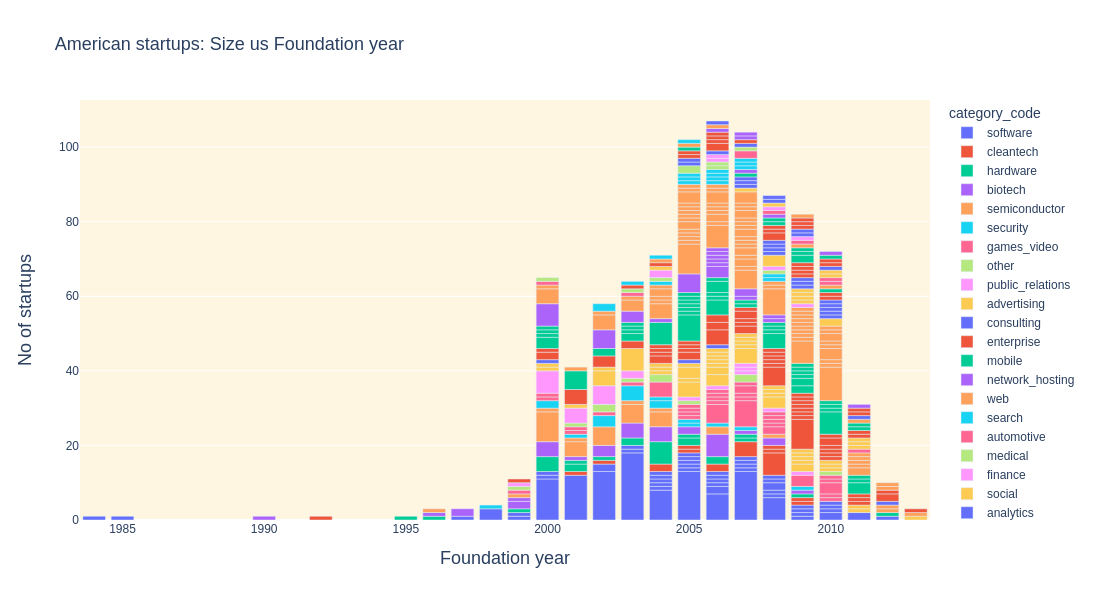

In [110]:
import plotly.express as px

fig1 = px.bar(df_category_founded, x="founded_at", y="size", color="category_code", title="American startups: Size us Foundation year", height=600)
fig1.update_layout(
    title={"text": "American startups: Size us Foundation year", "font": {"size": 18}},
    xaxis={"title": {"text": " Foundation year", "font": {"size": 18}}},
    yaxis={"title": {"text": " No of startups", "font": {"size": 18}}},
    paper_bgcolor='white',plot_bgcolor='rgb(254, 246, 224)'
)
fig1.show()

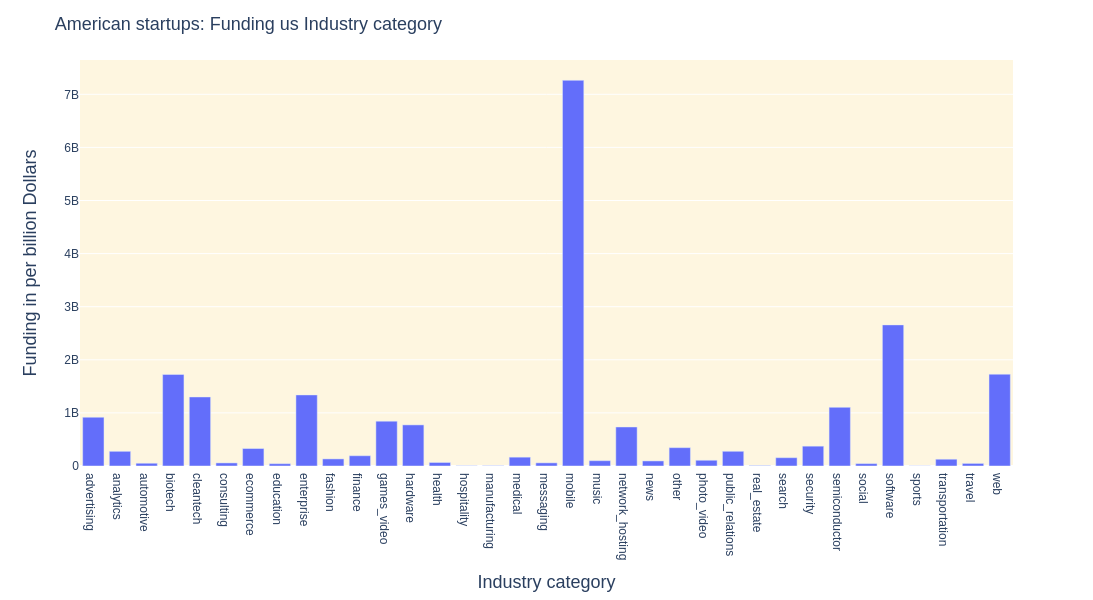

In [111]:
import plotly.express as px
#df_category_funding["funding"] = df_category_funding["funding"]
fig2 = px.bar(df_category_funding, x="category_code", y="funding", height=600)
fig2.update_layout(
    title={"text": "American startups: Funding us Industry category", "font": {"size": 18}},
    xaxis={"title": {"text": " Industry category", "font": {"size": 18}}},
    yaxis={"title": {"text": " Funding in per billion Dollars", "font": {"size": 18}}},
    paper_bgcolor='white',plot_bgcolor='rgb(254, 246, 224)'
)
fig2.show()

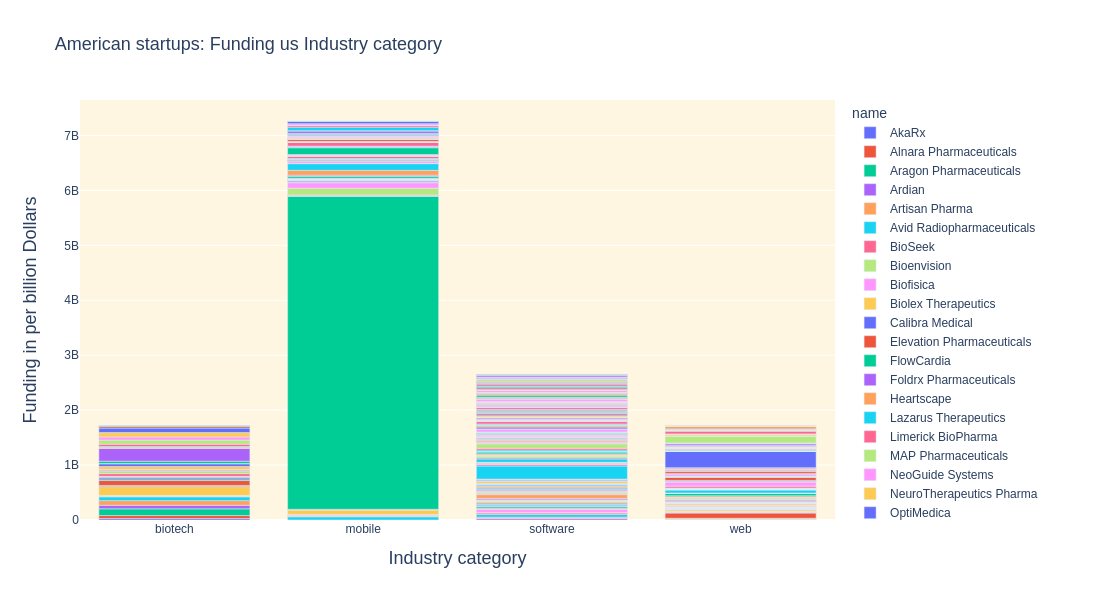

In [133]:
import plotly.express as px

fig3 = px.bar(df_category_company_funding, x="category_code", y="funding", color="name", title="American startups: Funding us Industry category", height=600)
fig3.update_layout(
    title={"text": "American startups: Funding us Industry category", "font": {"size": 18}},
    xaxis={"title": {"text": " Industry category", "font": {"size": 18}}},
    yaxis={"title": {"text": " Funding in per billion Dollars", "font": {"size": 18}}},
    paper_bgcolor='white',plot_bgcolor='rgb(254, 246, 224)'
)
fig3.show()